# How the trend of movies produced has changed over years

In [23]:
import pandas as pd
import os
import csv
import numpy as np
import re
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from matplotlib import cm

In [36]:
current_path =os.path.expanduser('~')
current_path =os.path.join(current_path,'Final_Exam')
input_path = os.path.join(current_path,'Data')
output_path = os.path.join(current_path,'Analysis')
output_path = os.path.join(output_path,'Analysis_4')

In [4]:
df_movies = pd.read_csv( input_path + '\\movies.csv', encoding='ISO-8859-1')         #read movies csv file into a dataframe
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
df_movies['yearOfRelease'] = df_movies.title.apply(lambda x : int(x[-5:-1]) if x[-5:-1].isdigit() else 1990)
df_movies.head()

,movieId,title,genres,yearOfRelease
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [29]:
genre_types = list(df_movies.genres.str.split('|').values) #for each movie create a genre list


In [30]:
genre_list =[]     
for x in genre_types:                              #combine all the lists into one and find the distinct values of genres
    genre_list.extend(x)
genre_list = set(genre_list)

In [8]:
for i in genre_list:                                                             #for each genre create a column in the table 
    df_movies[i] = 0                                                        #initiate the count to zero
    df_movies[i] = df_movies['genres'].apply(lambda x : (re.findall(i, x))) #check if the movie belongs to that genre 
    df_movies[i] = df_movies[i].apply(lambda x : 0 if len(x)==0 else 1)     #if movie belongs to that genre set tha count to 1
df_movies.tail()

,movieId,title,genres,yearOfRelease,(no genres listed),Documentary,War,Horror,Western,Film-Noir,...,Drama,Animation,Thriller,Adventure,Fantasy,Romance,Action,Sci-Fi,Children,Musical
27273,131254,Kein Bund fÃ¼r's Leben (2007),Comedy,2007,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27275,131258,The Pirates (2014),Adventure,2014,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
27276,131260,Rentun Ruusu (2001),(no genres listed),2001,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,2014,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [9]:
df_year_genre = df_movies.groupby('yearOfRelease')['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'].sum()
df_year_genre.head() 

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
yearOfRelease,,,,,,,,,,,,,,,,,,,,
1891,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1893,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1894,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1895,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1896,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [10]:
df_year_genre = df_year_genre.reset_index()
df_year_genre.head()

,yearOfRelease,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1891,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1893,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1894,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,1895,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1896,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [31]:
x1 = df_year_genre[-50:-1] #considering data for last 50 years

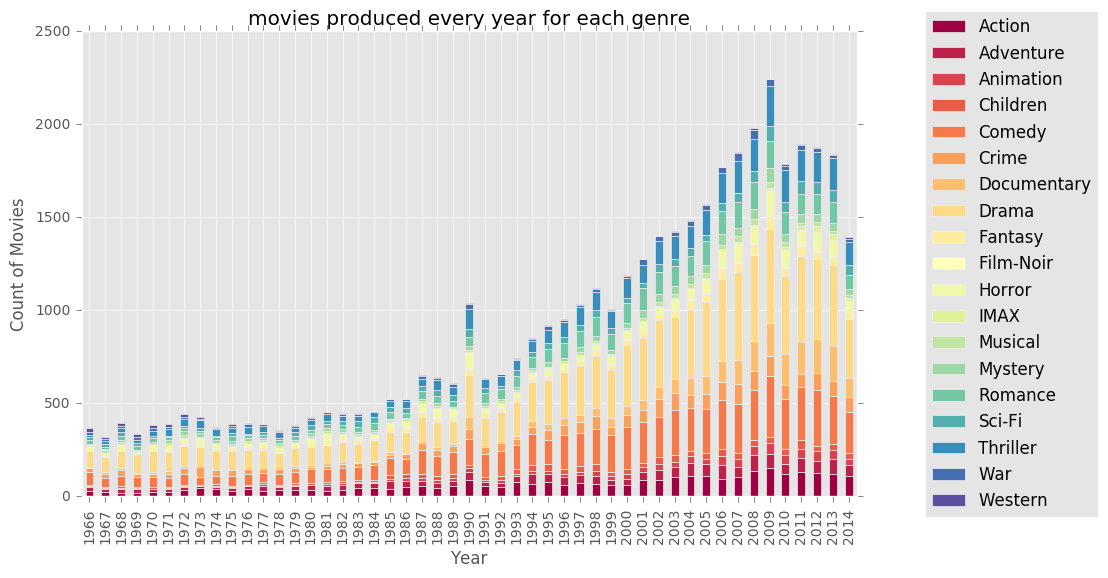

In [40]:
#my_colors = [(x/10.0, x/20.0, 0.75) for x in range(1,19)]
cmap = cm.get_cmap('Spectral')
ax = x1.plot.bar(x='yearOfRelease', y=['Action','Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'] , stacked = True, legend=False,cmap=cmap, figsize=(10,6) , title='movies produced every year for each genre' )
plt.legend(loc=10, bbox_to_anchor=(1.2, .5), ncol=1)
ax.set_xlabel('Year')
ax.set_ylabel('Count of Movies')
plt.savefig(output_path + '\\movies_every_year.jpeg')

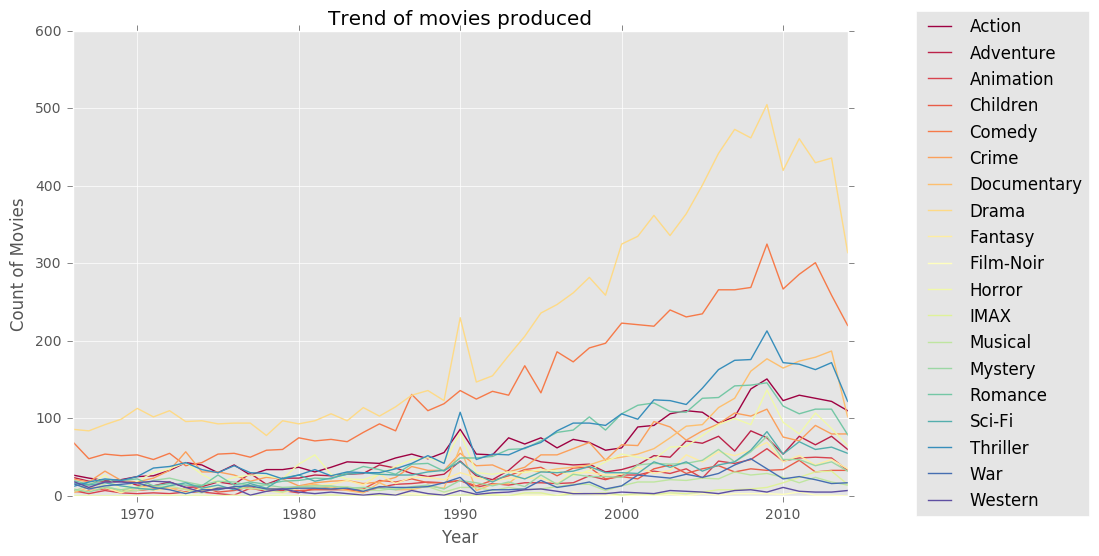

In [39]:
#my_colors = [(x/10.0, x/20.0, 0.75) for x in range(1,19)]
cmap = cm.get_cmap('Spectral')
ax = x1.plot(x='yearOfRelease', y=['Action','Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'] , legend=False,cmap=cmap, figsize=(10,6) , title='Trend of movies produced' )
plt.legend(loc=10, bbox_to_anchor=(1.2, .5), ncol=1)
ax.set_xlabel('Year')
ax.set_ylabel('Count of Movies')
plt.savefig(output_path + '\\movies_trend.jpeg')